<a href="https://colab.research.google.com/github/piegez/ai_generated_test/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [2]:
tf.__version__

'2.17.1'

In [3]:
%load_ext tensorboard

In [4]:
logdir='log'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.8954 - loss: 0.3367 - val_accuracy: 0.9844 - val_loss: 0.0480
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9857 - loss: 0.0470 - val_accuracy: 0.9868 - val_loss: 0.0362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - accuracy: 0.9890 - loss: 0.0341 - val_accuracy: 0.9898 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9918 - loss: 0.0253 - val_accuracy: 0.9903 - val_loss: 0.0303
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9921 - val_loss: 0.0253


In [13]:
y_true=test_labels
y_pred=model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [14]:
classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

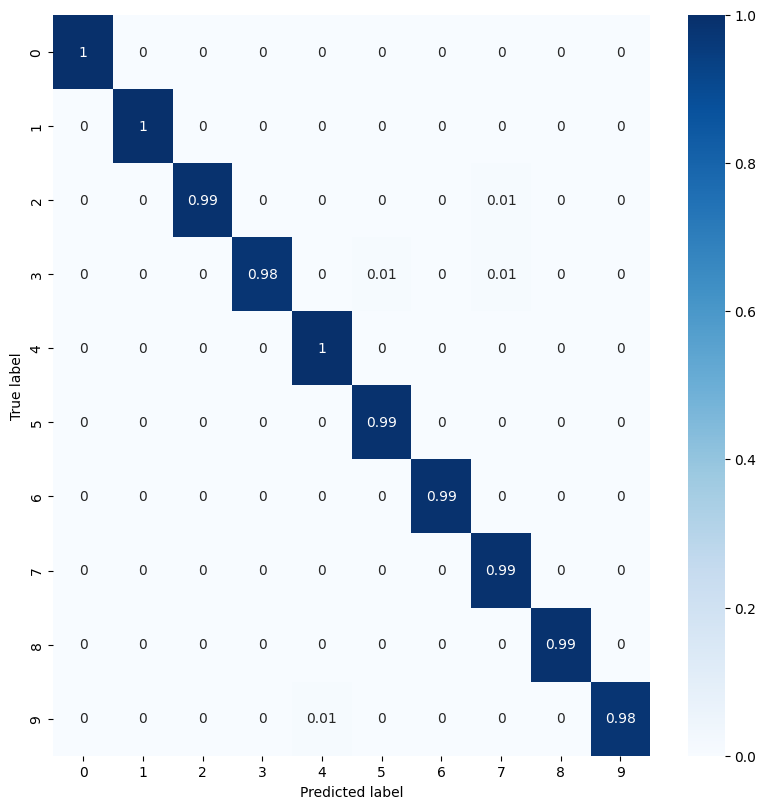

In [15]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_true, y_pred)

TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (FP + FN + TP)

sensitivity = TP / (TP + FN)

specificity = TN / (TN + FP)

accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)

f_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F-score:", f_score)

print(classification_report(y_true, y_pred))

Sensitivity: [0.99693878 0.99911894 0.99127907 0.98316832 0.99898167 0.99327354
 0.98643006 0.9922179  0.99486653 0.98414272]
Specificity: [0.99911308 0.99921038 0.99933095 0.9996663  0.99889111 0.99857268
 0.9998894  0.99777084 0.99911367 0.99966633]
Accuracy: [0.9989 0.9992 0.9985 0.998  0.9989 0.9981 0.9986 0.9972 0.9987 0.9981]
Precision: [0.99187817 0.99386503 0.9941691  0.99698795 0.98990918 0.98553949
 0.99894292 0.98076923 0.99181167 0.99698795]
F-score: [0.99440204 0.99648506 0.99272198 0.99002991 0.99442473 0.9893914
 0.99264706 0.98646035 0.99333675 0.99052369]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.9